TRABAJO FINAL | ARTICULO

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]

Lectura de datos

In [ ]:
train = pd.read_csv("train.csv")
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,2,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,3,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,6,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,3,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,3,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
test = pd.read_csv("test.csv")
test.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,1,D1,RENT,...,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,2,E3,MORTGAGE,...,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,1,C3,MORTGAGE,...,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,1,A2,RENT,...,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,3,B3,OWN,...,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145


In [ ]:
df = pd.concat([train,test],axis=0)
df.shape

(96376, 36)

In [ ]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Delinquency - two years
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,2,C4,MORTGAGE,...,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0.0,NaN
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,3,D3,RENT,...,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0.0,NaN
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,6,D4,MORTGAGE,...,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0.0,NaN
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,3,C3,MORTGAGE,...,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0.0,NaN
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,3,D4,MORTGAGE,...,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0.0,NaN


In [ ]:
df = df.loc[:,['Loan Amount','Interest Rate', 'Grade','Home Ownership', 'Debit to Income', 'Recoveries','Total Current Balance', 'Loan Status']]
df.head()

,Loan Amount,Interest Rate,Grade,Home Ownership,Debit to Income,Recoveries,Total Current Balance,Loan Status
0,10000,11.135007,2,176346.62670,16.284758,2.498291,311301,0.0
1,3609,12.237563,3,39833.92100,15.412409,2.377215,182610,0.0
2,28276,12.545884,6,91506.69105,28.137619,4.316277,89801,0.0
3,11170,16.731201,3,108286.57590,18.043730,0.107020,9189,0.0
4,16890,15.008300,3,44234.82545,17.209886,1294.818751,126029,0.0


In [ ]:
for i in df:
    print("The no.of unique values in",i,"are: ",df.loc[:,i].nunique())


The no.of unique values in Loan Amount are:  29737
The no.of unique values in Interest Rate are:  89117
The no.of unique values in Grade are:  7
The no.of unique values in Home Ownership are:  89997
The no.of unique values in Debit to Income are:  91895
The no.of unique values in Recoveries are:  88949
The no.of unique values in Total Current Balance are:  83321
The no.of unique values in Loan Status are:  2


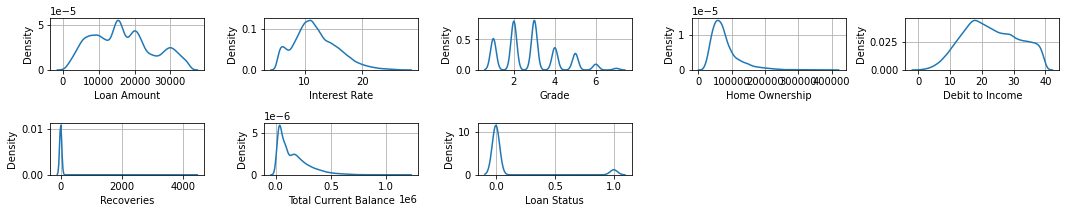

In [ ]:
r=5
c=5
it=1
for i in df:
    plt.subplot(r,c,it)
    sns.distplot(df.loc[:,i],hist=False)
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

In [ ]:
y = df['Loan Status']
x = df.drop('Loan Status',axis=1)

Estandarizando la información

In [ ]:
rs = RobustScaler()

In [ ]:
x = pd.DataFrame(rs.fit_transform(x),columns=x.columns)
x.head()

,Loan Amount,Interest Rate,Grade,Home Ownership,Debit to Income,Recoveries,Total Current Balance
0,-0.494173,-0.067255,-0.5,2.480360,-0.453543,-0.137250,1.098588
1,-1.025240,0.153106,0.0,-0.680332,-0.519360,-0.167486,0.375906
2,1.024493,0.214728,1.5,0.516053,0.440736,0.316751,-0.145277
3,-0.396950,1.051221,0.0,0.904559,-0.320831,-0.734415,-0.597965
4,0.078360,0.706875,0.0,-0.578438,-0.383743,322.590290,0.058167


In [ ]:
x.isnull().sum()

Loan Amount              0
Interest Rate            0
Grade                    0
Home Ownership           0
Debit to Income          0
Recoveries               0
Total Current Balance    0
dtype: int64

In [ ]:
x.shape

(96376, 7)

# Modelo

In [ ]:
xtrain = x[0:67463]
xtrain

,Loan Amount,Interest Rate,Grade,Home Ownership,Debit to Income,Recoveries,Total Current Balance
0,-0.494173,-0.067255,-0.5,2.480360,-0.453543,-0.137250,1.098588
1,-1.025240,0.153106,0.0,-0.680332,-0.519360,-0.167486,0.375906
2,1.024493,0.214728,1.5,0.516053,0.440736,0.316751,-0.145277
3,-0.396950,1.051221,0.0,0.904559,-0.320831,-0.734415,-0.597965
4,0.078360,0.706875,0.0,-0.578438,-0.383743,322.590290,0.058167
...,...,...,...,...,...,...,...
67458,-0.194944,-0.412249,0.0,0.341350,0.438285,140.238532,0.371216
67459,-0.633525,-0.299677,0.0,-0.086288,-0.347196,-0.257817,-0.522137
67460,-0.004155,1.634771,-1.0,-0.796560,-0.905401,0.655584,0.343599
67461,0.051520,0.339285,0.5,0.641824,-1.107690,-0.472093,1.379584


In [ ]:
xtest = x[67463:]
xtest

,Loan Amount,Interest Rate,Grade,Home Ownership,Debit to Income,Recoveries,Total Current Balance
67463,0.097472,0.138388,-1.0,0.167879,-0.418500,1.343005,2.020345
67464,-0.732410,-0.980774,-0.5,-0.720964,-0.312211,0.776431,-0.242927
67465,0.776451,0.651233,-1.0,-0.415414,-0.536139,0.663572,0.949908
67466,1.232648,-0.189420,-1.0,-0.008103,-0.075713,-0.144393,-0.420213
67467,-0.587407,-0.294699,0.0,0.517214,-1.319134,-0.229763,-0.139526
...,...,...,...,...,...,...,...
96371,1.583231,0.953047,0.0,6.732505,-1.130673,-0.761141,4.314571
96372,0.752270,0.701219,0.0,0.828465,-0.911118,-0.761141,2.236452
96373,1.167750,1.352775,0.5,0.113034,0.377539,-0.761141,1.014314
96374,0.752270,0.827133,0.5,1.407292,0.376785,-0.761141,1.757988


In [ ]:
ytrain = y[0:67463]
ytrain

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
67458    1.0
67459    0.0
67460    0.0
67461    0.0
67462    0.0
Name: Loan Status, Length: 67463, dtype: float64

In [ ]:
ytest = y[67463:]
ytest

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
28908   NaN
28909   NaN
28910   NaN
28911   NaN
28912   NaN
Name: Loan Status, Length: 28913, dtype: float64

In [ ]:
xc = sm.add_constant(xtrain)
xc.head()

,const,Loan Amount,Interest Rate,Grade,Home Ownership,Debit to Income,Recoveries,Total Current Balance
0,1.0,-0.494173,-0.067255,-0.5,2.480360,-0.453543,-0.137250,1.098588
1,1.0,-1.025240,0.153106,0.0,-0.680332,-0.519360,-0.167486,0.375906
2,1.0,1.024493,0.214728,1.5,0.516053,0.440736,0.316751,-0.145277
3,1.0,-0.396950,1.051221,0.0,0.904559,-0.320831,-0.734415,-0.597965
4,1.0,0.078360,0.706875,0.0,-0.578438,-0.383743,322.590290,0.058167


In [ ]:
ytrain = ytrain.astype('int')

In [ ]:
ytrain.value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()

model_list = [lr,dt,rf,knn,gnb]
cm = []
train_acc = []
for i in model_list:
    i_model = i.fit(xtrain,ytrain)
    ypred_train = i_model.predict(xtrain)
    ypred_test = i_model.predict(xtest)
    train_acc.append(accuracy_score(ytrain,ypred_train))

In [ ]:
train_acc

[0.9074900315728621,
 1.0,
 0.9999407082400723,
 0.9084979914916325,
 0.9074900315728621]

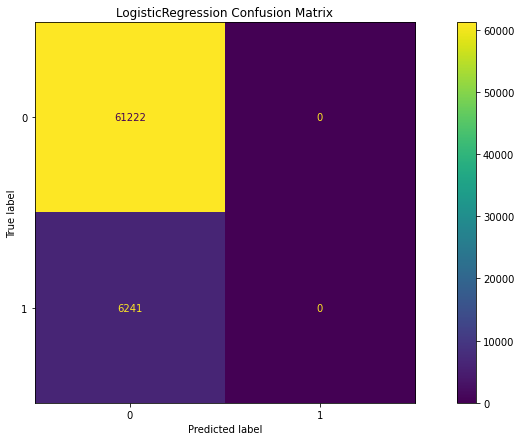

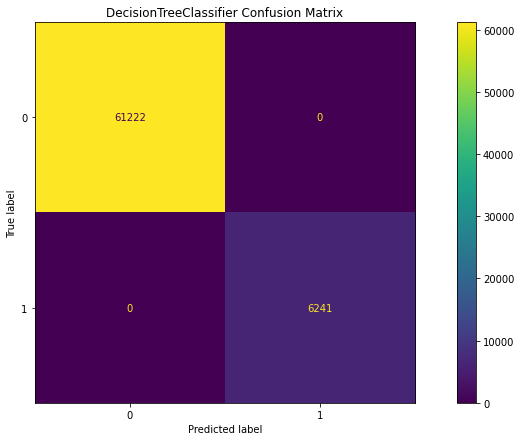

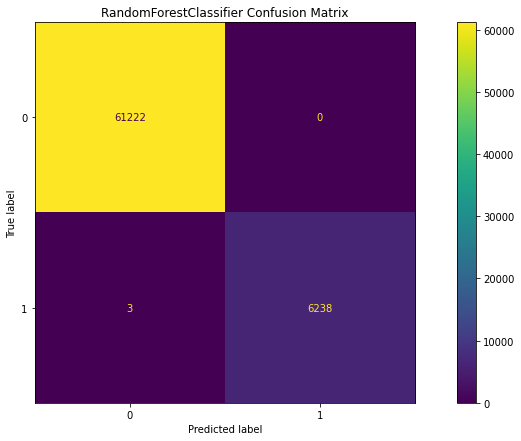

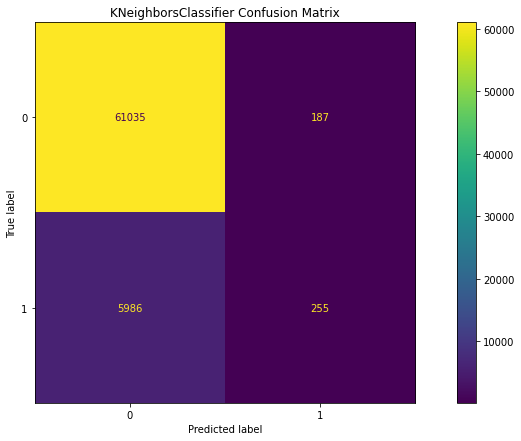

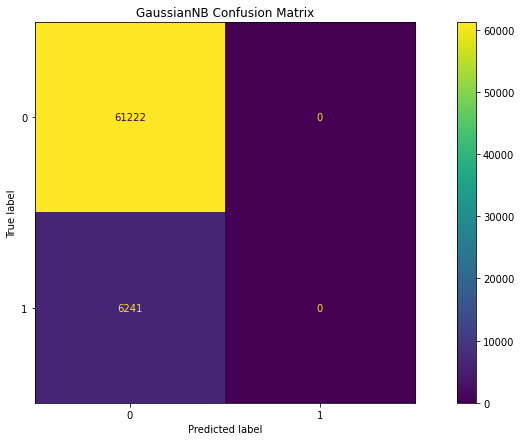

In [ ]:
for i in model_list:
    i_model = i.fit(xtrain,ytrain)
    ypred_train = i_model.predict(xtrain)
    ypred_test = i_model.predict(xtest)
    cm = confusion_matrix(ytrain, ypred_train)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(str(i.__class__.__name__) + " Confusion Matrix")
    plt.show()

Al parecer nuestro modelo Decision Tree Classifier y Random Forest son los mas acertados. 

Pondremos a prueba de nuevo al modelo para ver su acertación, ahora con el 80% de la base de train y el otro 20% para comparar

In [ ]:
train2 = pd.read_csv("train.csv")
train2.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,2,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,3,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,6,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,3,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,3,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
df2 = train2.loc[:,['Loan Amount','Interest Rate', 'Grade','Home Ownership', 'Debit to Income', 'Recoveries','Total Current Balance', 'Loan Status']]
df2.head()

,Loan Amount,Interest Rate,Grade,Home Ownership,Debit to Income,Recoveries,Total Current Balance,Loan Status
0,10000,11.135007,2,176346.62670,16.284758,2.498291,311301,0
1,3609,12.237563,3,39833.92100,15.412409,2.377215,182610,0
2,28276,12.545884,6,91506.69105,28.137619,4.316277,89801,0
3,11170,16.731201,3,108286.57590,18.043730,0.107020,9189,0
4,16890,15.008300,3,44234.82545,17.209886,1294.818751,126029,0


In [ ]:
df2.shape

(67463, 8)

In [ ]:
y2 = df2['Loan Status']
x2 = df2.drop('Loan Status',axis=1)

In [ ]:
rs2 = RobustScaler()

In [ ]:
x2 = pd.DataFrame(rs2.fit_transform(x2),columns=x2.columns)
x2.head()

,Loan Amount,Interest Rate,Grade,Home Ownership,Debit to Income,Recoveries,Total Current Balance
0,-0.502150,-0.049565,-0.5,2.492479,-0.479379,-0.221301,1.083912
1,-1.030594,0.175612,0.0,-0.687154,-0.545009,-0.252963,0.360913
2,1.009013,0.238582,1.5,0.516400,0.412351,0.254126,-0.160498
3,-0.405408,1.093358,0.0,0.907235,-0.347046,-0.846648,-0.613385
4,0.067554,0.741486,0.0,-0.584649,-0.409779,337.736628,0.043035


In [ ]:
x2.isnull().sum()

Loan Amount              0
Interest Rate            0
Grade                    0
Home Ownership           0
Debit to Income          0
Recoveries               0
Total Current Balance    0
dtype: int64

In [ ]:
x2.shape

(67463, 7)

# Modelo 2

In [ ]:
x2train = x2[0:53970]
x2train

,Loan Amount,Interest Rate,Grade,Home Ownership,Debit to Income,Recoveries,Total Current Balance
0,-0.502150,-0.049565,-0.5,2.492479,-0.479379,-0.221301,1.083912
1,-1.030594,0.175612,0.0,-0.687154,-0.545009,-0.252963,0.360913
2,1.009013,0.238582,1.5,0.516400,0.412351,0.254126,-0.160498
3,-0.405408,1.093358,0.0,0.907235,-0.347046,-0.846648,-0.613385
4,0.067554,0.741486,0.0,-0.584649,-0.409779,337.736628,0.043035
...,...,...,...,...,...,...,...
53965,-0.434761,0.755630,0.0,-0.756193,-0.284993,-0.027029,-0.434982
53966,1.441872,-0.459746,-0.5,0.090706,1.200939,-0.230506,0.142936
53967,-0.178518,0.517118,0.5,3.760965,-0.203466,-0.284028,3.006725
53968,-0.189185,-0.479452,0.0,0.582237,0.375201,-0.308099,-0.312496


In [ ]:
x2test = x2[53970:]
x2test

,Loan Amount,Interest Rate,Grade,Home Ownership,Debit to Income,Recoveries,Total Current Balance
53970,0.311642,-1.078739,0.0,0.669880,-0.449488,0.396314,-0.393110
53971,0.444105,0.143754,-0.5,-0.033761,0.627969,-0.178273,1.437723
53972,-0.875393,-0.686253,1.5,0.232857,-0.602296,633.877039,-0.432768
53973,-0.342484,1.524911,-0.5,-0.020612,0.078281,0.196222,-0.471129
53974,0.371755,-0.244983,-0.5,-0.685900,1.101971,-0.242751,1.560456
...,...,...,...,...,...,...,...
67458,-0.204399,-0.402100,0.0,0.340651,0.409906,146.779196,0.356221
67459,-0.640814,-0.287067,0.0,-0.089550,-0.373336,-0.347558,-0.537523
67460,-0.014553,1.689664,-1.0,-0.804078,-0.929950,0.608949,0.328592
67461,0.040847,0.365861,0.5,0.642925,-1.131662,-0.571946,1.365031


In [ ]:
y2train = y2[0:53970]
y2train

0        0
1        0
2        0
3        0
4        0
        ..
53965    1
53966    0
53967    0
53968    0
53969    0
Name: Loan Status, Length: 53970, dtype: int64

In [ ]:
y2test = y2[53970:]
y2test

53970    0
53971    0
53972    0
53973    0
53974    0
        ..
67458    1
67459    0
67460    0
67461    0
67462    0
Name: Loan Status, Length: 13493, dtype: int64

In [ ]:
y2train = y2train.astype('int')

In [ ]:
y2train.value_counts()

0    48941
1     5029
Name: Loan Status, dtype: int64

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()

model_list = [lr,dt,rf,knn,gnb]
train_acc2 = []
for i in model_list:
    i_model = i.fit(x2train,y2train)
    y2pred_train = i_model.predict(x2train)
    y2pred_test = i_model.predict(x2test)
    train_acc2.append(accuracy_score(y2train,y2pred_train))

In [ ]:
train_acc2

[0.9068186029275523,
 1.0,
 0.9999258847507875,
 0.907893274041134,
 0.9068186029275523]

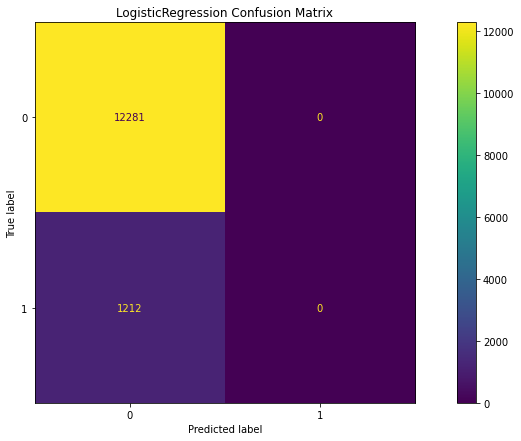

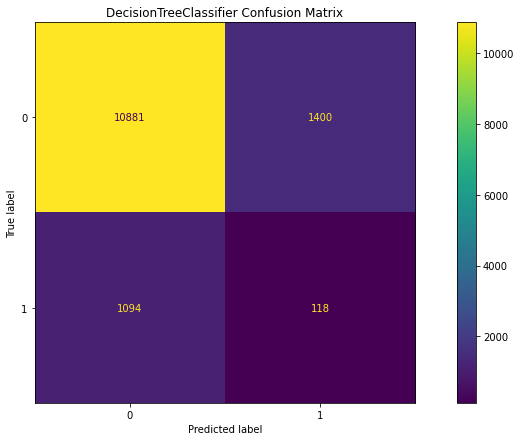

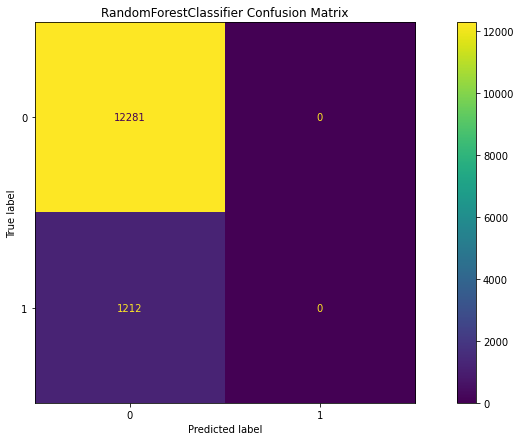

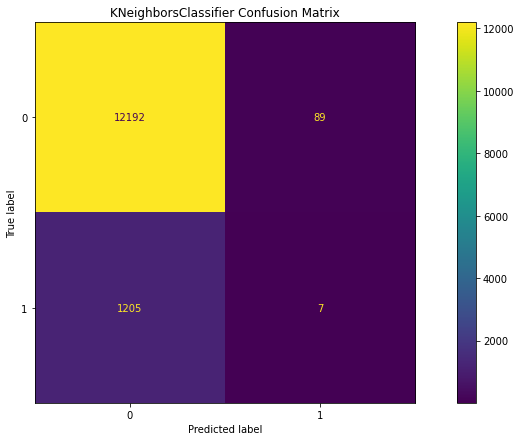

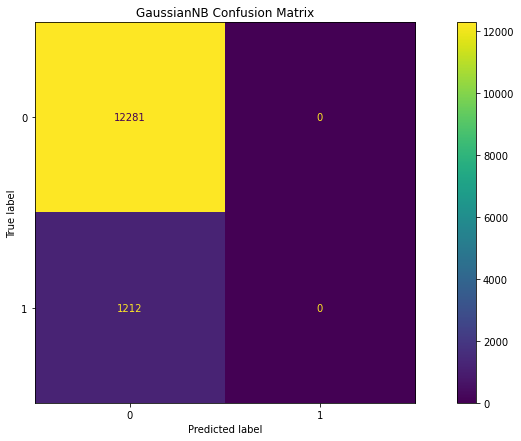

In [ ]:
for i in model_list:
    i_model = i.fit(x2train,y2train)
    y2pred_train = i_model.predict(x2train)
    y2pred_test = i_model.predict(x2test)
    cm = confusion_matrix(y2test, y2pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(str(i.__class__.__name__) + " Confusion Matrix")
    plt.show()

No hemos tenido buenos resultados.

# Modelo 3

Dado que estamos tratando con un desequilibrio de clases, debemos utilizar SMOTE, que es una técnica de sobremuestreo que generará muestras sintéticas de la clase minoritaria para equilibrar la distribución de clases.

SMOTE funciona seleccionando una muestra de la clase minoritaria y encontrando sus k-vecinos más cercanos para seleccionar uno de ellos al azar e interpolar una nueva muestra entre la muestra original y el vecino elegido, creando sintéticamente una nueva muestra de la clase minoritaria y repitiendo este proceso hasta que tengamos equilibrio entre ambas clases.

Este proceso se realiza porque el desequilibrio de clases puede hacer que los clasificadores se sesguen hacia la clase mayoritaria y les resulte difícil identificar correctamente los ejemplos de la clase minoritaria, lo que conduce a un rendimiento deficiente y puntuaciones de recuperación bajas.

In [ ]:
y2train.value_counts()

0    48941
1     5029
Name: Loan Status, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,recall_score, f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression,RidgeClassifier
import xgboost as xgb

In [ ]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x2train, y2train)

In [ ]:
y_resampled.value_counts()

0    48941
1    48941
Name: Loan Status, dtype: int64

In [ ]:
# Getting the value counts of y_test
value_counts = y2test.value_counts()

# Creating a dataframe from the value counts
test_values = pd.DataFrame({'Did not default': value_counts[0], 'Defaulted': value_counts[1]}, index=['Count'])
test_values

,Did not default,Defaulted
Count,12281,1212


In [ ]:
# Creando una funcion

def evaluate_classifier(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    recall = recall_score(y_test,y_pred)
    print(f'Recall: {recall*100:.2f}%')
    precision = precision_score(y_test,y_pred)
    print(f'Precision: {precision*100:.2f}%')
    f1 = f1_score(y_test,y_pred)
    print(f'F1 Score: {f1*100:.2f}%')
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index=['Verdadero (No Moroso)', 'Verdadero (Moroso)'], 
                         columns=['Predecido (No Moroso)', 'Predecido (Moroso)'])
    fig, ax = plt.subplots(figsize=(10,7))
    ax = sns.heatmap(df_cm, annot=True,fmt='d', annot_kws={"size": 15})

Accuracy: 52.84%
Recall: 47.36%
Precision: 9.11%
F1 Score: 15.28%


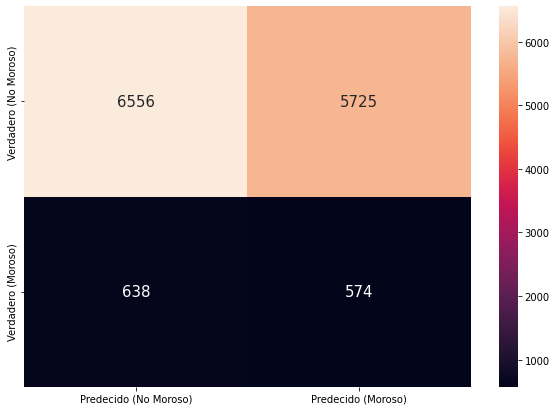

In [ ]:
# Evaluating Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(x2test)
evaluate_classifier(y2test, y_pred)

Accuracy: 74.71%
Recall: 17.41%
Precision: 8.04%
F1 Score: 11.00%


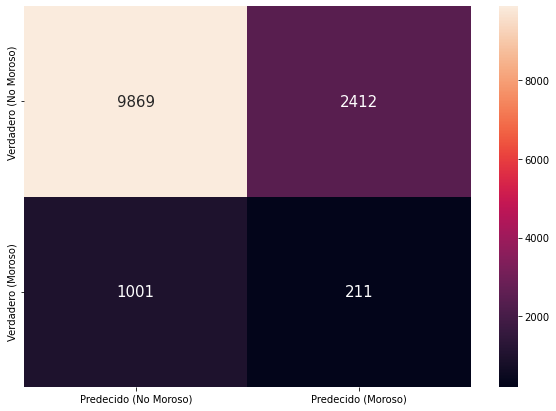

In [ ]:
# Evaluating Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_resampled, y_resampled)
y_pred = dt.predict(x2test)
evaluate_classifier(y2test, y_pred)

Accuracy: 88.06%
Recall: 3.55%
Precision: 8.87%
F1 Score: 5.07%


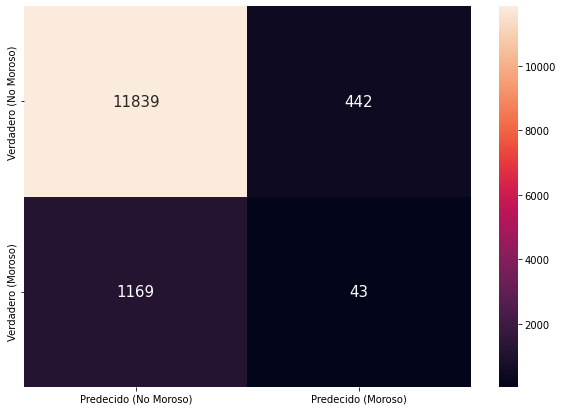

In [ ]:
# Evaluating Random Forest
randomforest = RandomForestClassifier(n_estimators=500)
randomforest.fit(X_resampled, y_resampled)
y_pred = randomforest.predict(x2test)
evaluate_classifier(y2test, y_pred)

Accuracy: 65.42%
Recall: 30.12%
Precision: 8.72%
F1 Score: 13.53%


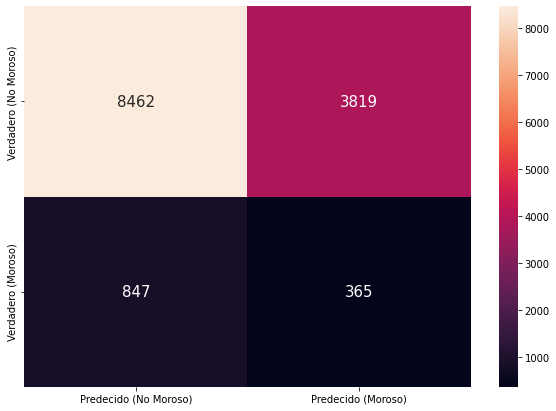

In [ ]:
# Evaluating Knn
knn = KNeighborsClassifier()
knn.fit(X_resampled, y_resampled)
y_pred = knn.predict(x2test)
evaluate_classifier(y2test, y_pred)